<a href="https://colab.research.google.com/github/imaboylol/itmo-advanced-ml-and-dl/blob/main/clustering/Clustering_Palette_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

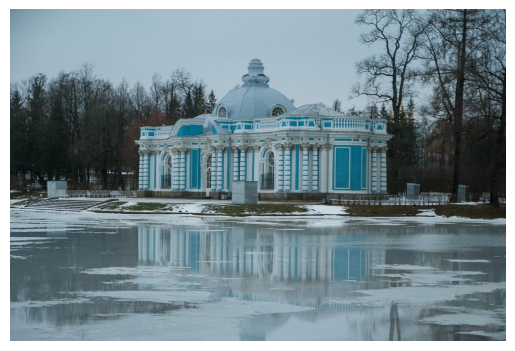

In [14]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = 'spb_barocco.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [15]:
# < ENTER YOUR CODE HERE >
image_array = np.array(img)

# Вычисление среднего значения интенсивности пикселей по всем каналам
mean_intensity_before = image_array.mean()

# Нормировка значений интенсивностей (деление на 255)
normalized_image_array = image_array / 255.0

# Вычисление среднего значения интенсивности после нормировки
mean_intensity_after = normalized_image_array.mean()

print(f"Среднее значение интенсивности до нормировки: {mean_intensity_before}")
print(f"Среднее значение интенсивности после нормировки: {mean_intensity_after}")

Среднее значение интенсивности до нормировки: 121.34244974201714
Среднее значение интенсивности после нормировки: 0.4758527440863417


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [16]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


Вычислите среднее значение интенсивности пикселей полученного изображения.

In [28]:
from sklearn.cluster import MiniBatchKMeans


image_path = 'spb_barocco.jpg'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Преобразование изображения в массив NumPy
image_array = np.array(image)

# Распрямление изображения: (высота * ширина, 3)
h, w, c = image_array.shape
flat_image_array = image_array.reshape(-1, 3)

# Нормировка значений интенсивностей (деление на 255)
normalized_flat_image = flat_image_array / 255.0

# Обучение модели MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16, random_state=12)
kmeans.fit(normalized_flat_image)

# Замена значений пикселей на координаты центроидов
clustered_image = kmeans.cluster_centers_[kmeans.labels_]
#clustered_image = (clustered_image * 255).astype(np.uint8)

# Преобразование массива обратно в изображение
#clustered_image_array = clustered_image.reshape(h, w, c)

# Вычисление среднего значения интенсивности пикселей полученного изображения
#mean_intensity_clustered = clustered_image_array.mean()

#mean_intensity_clustered
clustered_image.mean()

0.47596604434641404